## Luca Wolffenbüttel Bohnenberger e Louise Zanol Northfleet 


In [70]:
import pandas as pd 
import matplotlib.pyplot as plt

In [71]:
df_treino = pd.read_csv("treino_1.csv")
df_treino.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,195830,2282442,47,4,single,rented,yes,Petroleum_Engineer,Raipur,Chhattisgarh,4,13,1
1,43165,3217258,23,12,single,rented,yes,Petroleum_Engineer,Hospet,Karnataka,8,10,0
2,14308,5726991,78,8,single,rented,no,Scientist,Kamarhati,West_Bengal,8,10,0
3,166608,9601253,51,15,single,rented,no,Politician,Ichalkaranji,Maharashtra,10,11,0
4,31875,6915072,26,3,single,rented,no,Chemical_engineer,Howrah,West_Bengal,3,12,0


## Análise Exploratória

In [72]:
df_treino.describe().round(2) # das variaveis numericas nao parecem ter muitos outliers 

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,74796.00,74796.00,74796.00,74796.00,74796.00,74796.00,74796.00
mean,127268.67,4987836.17,49.67,9.96,6.29,11.99,0.33
std,74991.86,2886729.62,17.15,6.03,3.67,1.40,0.47
min,2.00,10310.00,21.00,0.00,0.00,10.00,0.00
25%,61518.00,2472911.50,34.00,5.00,3.00,11.00,0.00
50%,127120.00,4990273.00,50.00,10.00,6.00,12.00,0.00
75%,195114.75,7488205.00,65.00,15.00,9.00,13.00,1.00
max,251998.00,9999180.00,79.00,20.00,14.00,14.00,1.00


In [73]:
df_treino.info()
# nos temos 7 variaveis numericas e 6 categoricas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74796 entries, 0 to 74795
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 74796 non-null  int64 
 1   Income             74796 non-null  int64 
 2   Age                74796 non-null  int64 
 3   Experience         74796 non-null  int64 
 4   Married/Single     74796 non-null  object
 5   House_Ownership    74796 non-null  object
 6   Car_Ownership      74796 non-null  object
 7   Profession         74796 non-null  object
 8   CITY               74796 non-null  object
 9   STATE              74796 non-null  object
 10  CURRENT_JOB_YRS    74796 non-null  int64 
 11  CURRENT_HOUSE_YRS  74796 non-null  int64 
 12  Risk_Flag          74796 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 7.4+ MB


In [74]:
df_treino.head(3)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,195830,2282442,47,4,single,rented,yes,Petroleum_Engineer,Raipur,Chhattisgarh,4,13,1
1,43165,3217258,23,12,single,rented,yes,Petroleum_Engineer,Hospet,Karnataka,8,10,0
2,14308,5726991,78,8,single,rented,no,Scientist,Kamarhati,West_Bengal,8,10,0


Nesse data frame nos temos 74796 linhas e 13 colunas  

In [75]:
df_treino.shape
# (74796, 13)

(74796, 13)

### Temos 2 variaveis binarias **Car_Ownership e Married/Single** 

que estao em represendados como yes(sim), no(nao) e merried (casado) e single (solteiro)

Married/Single 
    0 --> 67458 linhas 
    1 --> 7338 linhas 

Car_Ownership
    no --> 52693 linhas 
    yes --> 22103 linhas 

In [76]:
df_treino["Married/Single"].value_counts()

Married/Single
single     67458
married     7338
Name: count, dtype: int64

In [77]:
df_treino["Car_Ownership"].value_counts()

Car_Ownership
no     52693
yes    22103
Name: count, dtype: int64

### Temos 4 variaveis **nao binarias** com 3 ou mais categorias, essas sao:

- House_Ownership --> 3 tipos 
- Profession --> 51 tipos 
- CITY --> 317 tipos
- STATE --> 29 tipos 

In [78]:
df_treino["House_Ownership"].value_counts()

House_Ownership
rented          69164
owned            3605
norent_noown     2027
Name: count, dtype: int64

In [79]:
df_treino["Profession"].str.strip().str.lower().value_counts() # checando se precisa normalizar os dados (nao precisa)
df_treino["Profession"].nunique()

51

In [80]:
df_treino["CITY"].nunique()

317

In [81]:
df_treino["STATE"].nunique()

29

### Qualidade dos dados 

Nao temos nenhum dado faltando ou duplicado

In [82]:
# Checa valores faltantes 
na = df_treino.isna().mean().sort_values(ascending=False)
na 

Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

In [83]:
# Checa Duplicadas 
dup = df_treino.duplicated().sum()
dup

0

In [84]:
# Valores únicos por coluna
card = df_treino.nunique().sort_values(ascending=False)
card

Id                   74796
Income               18405
CITY                   317
Age                     59
Profession              51
STATE                   29
Experience              21
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
House_Ownership          3
Married/Single           2
Car_Ownership            2
Risk_Flag                2
dtype: int64

### Estatisticas Descritivas 

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter

In [86]:
df_treino[["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Risk_Flag"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,74796.0,4.987836e+06,2.886730e+06,10310.0,2472911.5,4990273.0,7488205.0,9999180.0
Age,74796.0,4.966915e+01,1.714527e+01,21.0,34.0,50.0,65.0,79.0
Experience,74796.0,9.964878e+00,6.030755e+00,0.0,5.0,10.0,15.0,20.0
CURRENT_JOB_YRS,74796.0,6.293639e+00,3.671066e+00,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,74796.0,1.198913e+01,1.399303e+00,10.0,11.0,12.0,13.0,14.0
Risk_Flag,74796.0,3.315151e-01,4.707609e-01,0.0,0.0,0.0,1.0,1.0


##### Distribuicoes das features 

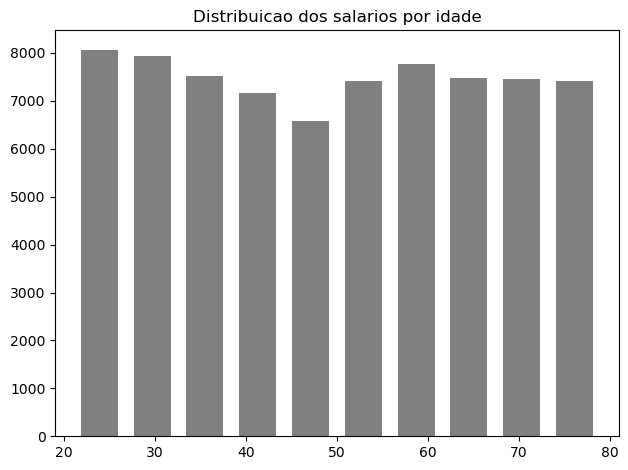

In [87]:
plt.title("Distribuicao dos salarios por idade")
plt.hist( df_treino["Age"], bins=10, color='grey', rwidth= 0.7, label=None, stacked=False, data=None)
plt.tight_layout()
plt.show()

/var/folders/3g/vyf8d5n95sbgpg45t1qcx4900000gn/T/ipykernel_81379/12938557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CURRENT_HOUSE_YRS', y='Income', data=df, palette='rocket')


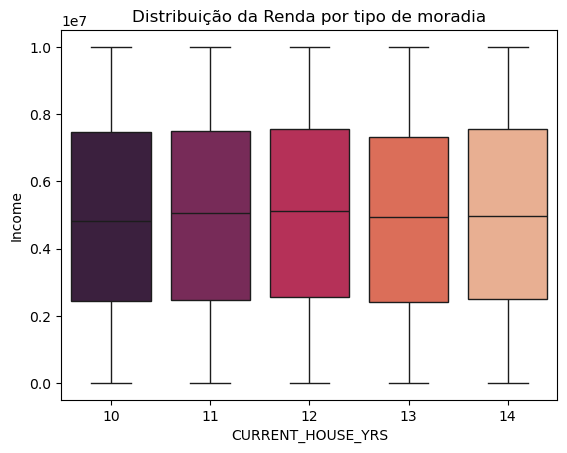

In [ ]:
num_df = df_treino[["CURRENT_HOUSE_YRS", "Income"]]
sns.boxplot(x='CURRENT_HOUSE_YRS', y='Income', data=df, palette='rocket')
plt.title("Distribuição da Renda por tipo de moradia")
plt.show()

/var/folders/3g/vyf8d5n95sbgpg45t1qcx4900000gn/T/ipykernel_81379/1218357362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CURRENT_JOB_YRS', y='Income', data=df, palette='rocket')


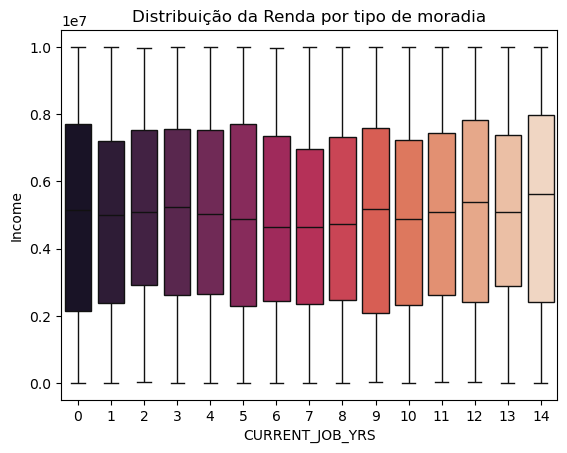

In [ ]:
num_df = df_treino[["CURRENT_JOB_YRS", "Income"]]
sns.boxplot(x='CURRENT_JOB_YRS', y='Income', data=df, palette='rocket')
plt.title("Distribuição da Renda por tipo de moradia")
plt.show()

/var/folders/3g/vyf8d5n95sbgpg45t1qcx4900000gn/T/ipykernel_81379/4226478140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='House_Ownership', y='Income', data=df, palette='cividis')


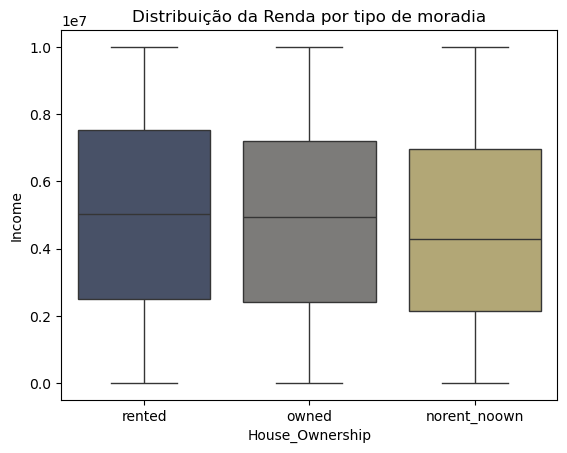

In [ ]:
num_df = df_treino[["House_Ownership", "Age"]]
sns.boxplot(x='House_Ownership', y='Income', data=df, palette='rocket')
plt.title("Distribuição da Renda por tipo de moradia")
plt.show()

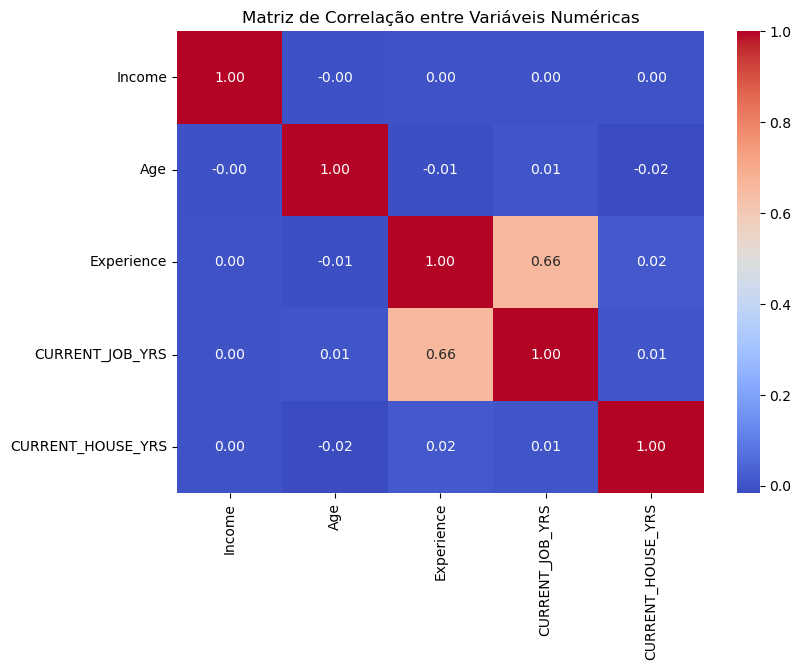

In [ ]:
num_df = df_treino[["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"]]
correlacoes = num_df.corr()
plt.figure(figsize=(8.5, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

## Tratamento dos Dados

Dados Binarios:

In [ ]:
df_treino.loc[df_treino["Married/Single"] == "single", "Married/Single"] = 0
df_treino.loc[df_treino["Married/Single"] == "married", "Married/Single"] = 1
df_treino["Married/Single"].value_counts()

Married/Single
0    67458
1     7338
Name: count, dtype: int64

In [ ]:
df_treino.loc[df_treino["Car_Ownership"] == "yes", "Car_Ownership"] = 1
df_treino.loc[df_treino["Car_Ownership"] == "no", "Car_Ownership"] = 0
df_treino["Car_Ownership"].value_counts()

Car_Ownership
0    52693
1    22103
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from xgboost import XGBClassifier
df_treino = pd.read_csv("treino_1.csv")

In [ ]:
bumblebee = ColumnTransformer([
    ("binario", OneHotEncoder(drop= "if_binary"), ["Married/Single", "Car_Ownership"]),
    ("mult", OneHotEncoder(drop= "first"), ["House_Ownership", "STATE", "Profession", "CITY"])
    ],remainder="passthrough")

In [ ]:
mestre_splinter = Pipeline([
    ("pre-processamento", bumblebee), 
    ("modelo", RandomForestClassifier())
    ])

In [ ]:
X = df_treino.drop("Risk_Flag", axis=1)
y = df_treino["Risk_Flag"]


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y)

In [ ]:
mestre_splinter.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pre-processamento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binario',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Married/Single',
                                                   'Car_Ownership']),
                                                 ('mult',
                                                  OneHotEncoder(drop='first'),
                                                  ['House_Ownership', 'STATE',
                                                   'Profession', 'CITY'])])),
                ('modelo', RandomForestClassifier())])

In [ ]:
y_pred = mestre_splinter.predict(X_valid)
y_pred1 = mestre_splinter.predict(X_train)
print("Treino: Acuracia: ",accuracy_score(y_pred1, y_train), "--- F1: ", f1_score(y_pred1, y_train))
print("Validação: Acuracia: ",accuracy_score(y_pred, y_valid), "--- F1: ", f1_score(y_pred, y_valid))

Treino: Acuracia:  1.0 --- F1:  1.0
Validação: Acuracia:  0.8349598930481283 --- F1:  0.7352278820375335


In [ ]:
aurelio = {
    #"modelo__n_estimators": [325],
    "modelo__max_depth": [None, 5, 15],
    "modelo__min_samples_leaf": [1, 4, 8]

}
    # max_depth: Int | None = None,
    # min_samples_split: float = 2,
    # min_samples_leaf: float = 1,
    # min_weight_fraction_leaf: Float = 0,
    # max_features: float | Literal['sqrt', 'log2'] = "sqrt",
    # max_leaf_nodes: Int | None = None,
    # min_impurity_decrease: Float = 0,

# Random florest Classifier 

In [ ]:
pedro_alvares_cabral = GridSearchCV(mestre_splinter, param_grid=aurelio, scoring=["accuracy", "f1_micro"], refit="f1_micro", n_jobs= -1, cv=3)

In [ ]:
pedro_alvares_cabral.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre-processamento',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binario',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Married/Single',
                                                                          'Car_Ownership']),
                                                                        ('mult',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['House_Ownership',
                                                                          'STATE',
                                                                          'Profession',
                                                                          'CITY'])])),
                                       ('modelo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'modelo__max_depth': [None, 5, 15],
                         'modelo__min_samples_leaf': [1, 4, 8]},
             refit='f1_micro', scoring=['accuracy', 'f1_micro'])

In [ ]:
pedro_alvares_cabral.best_params_

{'modelo__max_depth': None, 'modelo__min_samples_leaf': 1}

In [ ]:
y_pred = pedro_alvares_cabral.best_estimator_.predict(X_valid)
y_pred1 = pedro_alvares_cabral.best_estimator_.predict(X_train)
print("Treino: Acuracia: ",accuracy_score(y_pred1, y_train), "--- F1: ", f1_score(y_pred1, y_train))
print("Validação: Acuracia: ",accuracy_score(y_pred, y_valid), "--- F1: ", f1_score(y_pred, y_valid))

Treino: Acuracia:  1.0 --- F1:  1.0
Validação: Acuracia:  0.8343582887700535 --- F1:  0.7326860841423948


# XGBost 

In [ ]:
mestre_splinter = Pipeline([
    ("pre", bumblebee),
    ("modelo", XGBClassifier(
        n_estimators=400,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        tree_method="hist",   # "gpu_hist" se tiver GPU NVIDIA
        n_jobs=-1,
        eval_metric="logloss" # evita warning
    ))
])

In [ ]:
scoring = {
    "accuracy": "accuracy",
    "f1": make_scorer(f1_score, average="binary")  # se multiclass, use "macro" ou "weighted"
}

In [ ]:
aurelio = {
    "modelo__n_estimators": [200, 400],
    "modelo__max_depth": [3, 4, 6],
    "modelo__learning_rate": [0.05, 0.1],
    "modelo__subsample": [0.8, 1.0],
    "modelo__colsample_bytree": [0.8, 1.0],
}

In [ ]:
pedro_alvares_cabral = GridSearchCV(
    mestre_splinter,
    param_grid=aurelio,
    scoring=scoring,
    refit="f1",     # << chave para não dar o erro de multimetric
    cv=5,
    n_jobs=-1,
    verbose=1
)

pedro_alvares_cabral.fit(X_train, y_train)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binario',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['Married/Single',
                                                                          'Car_Ownership']),
                                                                        ('mult',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['House_Ownership',
                                                                          'STATE',
                                                                          'Profession',
                                                                          'CITY'])])),
                                       ('modelo',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsampl...
                                                      n_estimators=400,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'modelo__colsample_bytree': [0.8, 1.0],
                         'modelo__learning_rate': [0.05, 0.1],
                         'modelo__max_depth': [3, 4, 6],
                         'modelo__n_estimators': [200, 400],
                         'modelo__subsample': [0.8, 1.0]},
             refit='f1',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict', average=binary)},
             verbose=1)

In [ ]:
# avaliação no conjunto de validação/teste
y_pred = pedro_alvares_cabral.predict(X_valid)
y_pred2 = pedro_alvares_cabral.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred2))
print("F1:", f1_score(y_train, y_pred2))
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1:", f1_score(y_valid, y_pred))

Accuracy: 0.8717327361454643
F1: 0.779054034602873
Accuracy: 0.8281417112299465
F1: 0.6998949457219563
